<a href="https://colab.research.google.com/github/muhamadfadil316/IR/blob/main/Praktikum01IR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
#Membaca File

import pandas as pd

df = pd.read_xml('/content/kompas-beritaPart1.xml')
df.head()

,sumber,tanggal,kategori,judul,isi,link,jumlahkata
0,kompas.com,2015/07/01,Teknologi,"Ponsel Huawei Honor 4C Dibanderol Rp 2,2 Juta","JAKARTA, KOMPAS.com Ponsel Android Huawei Hon...",http://tekno.kompas.com/read/xml/2015/07/01/18...,315
1,kompas.com,2015/07/01,Teknologi,Asosiasi: RPP E-commerce Tidak Sesuai Hasil Di...,"JAKARTA, KOMPAS.com - Sejak 2013, wacana tenta...",http://tekno.kompas.com/read/xml/2015/07/01/16...,419
2,kompas.com,2015/07/01,Teknologi,"Pemesan ""iPhone Jadi Sabun"" Karyawan Pesaing L...","JAKARTA, KOMPAS.com Danis Darusman, pelanggan ...",http://tekno.kompas.com/read/xml/2015/07/01/15...,265
3,kompas.com,2015/07/01,Teknologi,"""Autofeather Failure"", Momok bagi Pesawat Bali...",KOMPAS.com Salah satu momok yang dihadapi dala...,http://tekno.kompas.com/read/xml/2015/07/01/14...,481
4,kompas.com,2015/07/01,Teknologi,Laptop Bezel Tertipis di Dunia Masuk Indonesia,"JAKARTA, KOMPAS.com - Resmi diperkenalkan pada...",http://tekno.kompas.com/read/xml/2015/07/01/14...,227


In [39]:
#Mencari informasi data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1502 entries, 0 to 1501
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sumber      1502 non-null   object
 1   tanggal     1502 non-null   object
 2   kategori    1502 non-null   object
 3   judul       1502 non-null   object
 4   isi         1502 non-null   object
 5   link        1502 non-null   object
 6   jumlahkata  1502 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 82.3+ KB


In [40]:
#Memeriksa nilai NaN dan Duplikat

df.isnull().sum()

,0
sumber,0
tanggal,0
kategori,0
judul,0
isi,0
link,0
jumlahkata,0


In [41]:
df.duplicated().sum()

np.int64(0)

In [42]:
#Case Folding (mengubah huruf kapital menjadi huruf kecil)

def caseFolding(text):
  text = text.lower()
  return text

contoh = "Terima kasih, Kak! Kamu sangat baik sekali kepadaku"
print(f'original: {contoh}')
print(f'case folding: {caseFolding(contoh)}')

original: Terima kasih, Kak! Kamu sangat baik sekali kepadaku
case folding: terima kasih, kak! kamu sangat baik sekali kepadaku


In [43]:
#Punctuation Removal

import re

def punctuatioRemoval(text):
  text = re.sub(r'[^\w\s]', '', text)
  return text

contoh = "Terima kasih, Kak! Kamu sangat baik sekali kepadaku"
print(f'original: {contoh}')
print(f'punctuation removal: {punctuatioRemoval(contoh)}')

original: Terima kasih, Kak! Kamu sangat baik sekali kepadaku
punctuation removal: Terima kasih Kak Kamu sangat baik sekali kepadaku


In [44]:
#Menerapkan Function

df['clean'] = df['isi'].apply(caseFolding)
df['clean'] = df['clean'].apply(punctuatioRemoval)
df.head()

,sumber,tanggal,kategori,judul,isi,link,jumlahkata,clean
0,kompas.com,2015/07/01,Teknologi,"Ponsel Huawei Honor 4C Dibanderol Rp 2,2 Juta","JAKARTA, KOMPAS.com Ponsel Android Huawei Hon...",http://tekno.kompas.com/read/xml/2015/07/01/18...,315,jakarta kompascom ponsel android huawei honor...
1,kompas.com,2015/07/01,Teknologi,Asosiasi: RPP E-commerce Tidak Sesuai Hasil Di...,"JAKARTA, KOMPAS.com - Sejak 2013, wacana tenta...",http://tekno.kompas.com/read/xml/2015/07/01/16...,419,jakarta kompascom sejak 2013 wacana tentang r...
2,kompas.com,2015/07/01,Teknologi,"Pemesan ""iPhone Jadi Sabun"" Karyawan Pesaing L...","JAKARTA, KOMPAS.com Danis Darusman, pelanggan ...",http://tekno.kompas.com/read/xml/2015/07/01/15...,265,jakarta kompascom danis darusman pelanggan laz...
3,kompas.com,2015/07/01,Teknologi,"""Autofeather Failure"", Momok bagi Pesawat Bali...",KOMPAS.com Salah satu momok yang dihadapi dala...,http://tekno.kompas.com/read/xml/2015/07/01/14...,481,kompascom salah satu momok yang dihadapi dalam...
4,kompas.com,2015/07/01,Teknologi,Laptop Bezel Tertipis di Dunia Masuk Indonesia,"JAKARTA, KOMPAS.com - Resmi diperkenalkan pada...",http://tekno.kompas.com/read/xml/2015/07/01/14...,227,jakarta kompascom resmi diperkenalkan pada aj...


In [45]:
#Membuat Function Tokenisasi

def tokenize(text):
  return text.split(" ")

contoh = "Terima Kasih, Kak! Kamu Sangat Baik Padamu"
print(f'original: {contoh}')

clean = caseFolding(contoh)
clean = punctuatioRemoval(clean)
print(f'tokenization: {tokenize(contoh)}')

original: Terima Kasih, Kak! Kamu Sangat Baik Padamu
tokenization: ['Terima', 'Kasih,', 'Kak!', 'Kamu', 'Sangat', 'Baik', 'Padamu']


In [46]:
#Menerapkan Tokenisasi

df['tokens'] = df['clean'].apply(tokenize)
df.head()

,sumber,tanggal,kategori,judul,isi,link,jumlahkata,clean,tokens
0,kompas.com,2015/07/01,Teknologi,"Ponsel Huawei Honor 4C Dibanderol Rp 2,2 Juta","JAKARTA, KOMPAS.com Ponsel Android Huawei Hon...",http://tekno.kompas.com/read/xml/2015/07/01/18...,315,jakarta kompascom ponsel android huawei honor...,"[jakarta, kompascom, , ponsel, android, huawei..."
1,kompas.com,2015/07/01,Teknologi,Asosiasi: RPP E-commerce Tidak Sesuai Hasil Di...,"JAKARTA, KOMPAS.com - Sejak 2013, wacana tenta...",http://tekno.kompas.com/read/xml/2015/07/01/16...,419,jakarta kompascom sejak 2013 wacana tentang r...,"[jakarta, kompascom, , sejak, 2013, wacana, te..."
2,kompas.com,2015/07/01,Teknologi,"Pemesan ""iPhone Jadi Sabun"" Karyawan Pesaing L...","JAKARTA, KOMPAS.com Danis Darusman, pelanggan ...",http://tekno.kompas.com/read/xml/2015/07/01/15...,265,jakarta kompascom danis darusman pelanggan laz...,"[jakarta, kompascom, danis, darusman, pelangga..."
3,kompas.com,2015/07/01,Teknologi,"""Autofeather Failure"", Momok bagi Pesawat Bali...",KOMPAS.com Salah satu momok yang dihadapi dala...,http://tekno.kompas.com/read/xml/2015/07/01/14...,481,kompascom salah satu momok yang dihadapi dalam...,"[kompascom, salah, satu, momok, yang, dihadapi..."
4,kompas.com,2015/07/01,Teknologi,Laptop Bezel Tertipis di Dunia Masuk Indonesia,"JAKARTA, KOMPAS.com - Resmi diperkenalkan pada...",http://tekno.kompas.com/read/xml/2015/07/01/14...,227,jakarta kompascom resmi diperkenalkan pada aj...,"[jakarta, kompascom, , resmi, diperkenalkan, p..."


In [47]:
from collections import Counter

all_token = []
for tokens in df['tokens']:
    for token in tokens:
        all_token.append(token)

term_freq = Counter(all_token)
term_freq_df = pd.DataFrame(term_freq.items(), columns=['term', 'freq'])
term_freq_df_sorted = term_freq_df.sort_values(by='freq', ascending=False)
term_freq_df_sorted.head()

,term,freq
133,yang,6450
10,di,5824
126,dan,4915
2,,4264
35,ini,2744


In [48]:
term_freq_df_sorted['rank'] = term_freq_df_sorted['freq'].rank(method='first', ascending=False).astype(int)
term_freq_df_sorted.head()

,term,freq,rank
133,yang,6450,1
10,di,5824,2
126,dan,4915,3
2,,4264,4
35,ini,2744,5


In [49]:
# 1️⃣ Import library yang dibutuhkan
import pandas as pd
from collections import Counter

# 2️⃣ Misalnya kamu sudah punya DataFrame df dengan kolom 'tokens'
# Contoh: df['tokens'] = [['saya', 'makan', 'nasi'], ['nasi', 'ayam', 'dan', 'saya']]

# 3️⃣ Gabungkan semua token ke dalam satu list
all_token = []
for tokens in df['tokens']:
    for token in tokens:
        all_token.append(token)

# 4️⃣ Hitung frekuensi setiap term
term_freq = Counter(all_token)

# 5️⃣ Ubah jadi DataFrame
term_freq_df = pd.DataFrame(term_freq.items(), columns=['term', 'Frequency (ft,d)'])

# 6️⃣ Urutkan berdasarkan frekuensi secara descending
term_freq_df_sorted = term_freq_df.sort_values(by='Frequency (ft,d)', ascending=False).reset_index(drop=True)

# 7️⃣ Tambahkan kolom Rank (jika ada nilai frekuensi yang sama, tetap unik)
term_freq_df_sorted['Rank'] = term_freq_df_sorted['Frequency (ft,d)'].rank(method='first', ascending=False).astype(int)

# 8️⃣ Urutkan berdasarkan Rank dari kecil ke besar
tf_sorted_rank = term_freq_df_sorted.sort_values(by='Rank', ascending=True)

# 9️⃣ Tampilkan 20 besar
tf_sorted_rank.head(20)

,term,"Frequency (ft,d)",Rank
0,yang,6450,1
1,di,5824,2
2,dan,4915,3
3,,4264,4
4,ini,2744,5
5,dengan,2625,6
6,untuk,2583,7
7,dari,2460,8
8,itu,2437,9
9,akan,2055,10


In [50]:
# Ambil 10 kata dengan frekuensi terendah
tf_sorted_lowest = tf_sorted_rank.sort_values(by='Frequency (ft,d)', ascending=True).head(10).copy()

# Tambahkan kolom Rank baru (lokal)
tf_sorted_lowest['Rank (Lokal)'] = range(1, len(tf_sorted_lowest) + 1)

# Tampilkan hasil
print("10 Kata dengan Frekuensi Terendah:")
display(tf_sorted_lowest[['Rank (Lokal)', 'term', 'Frequency (ft,d)']])

10 Kata dengan Frekuensi Terendah:


,Rank (Lokal),term,"Frequency (ft,d)"
13347,1,wargabegitu,1
13327,2,kerabatkami,1
13326,3,asih,1
13325,4,katanyasesuai,1
13356,5,bodong,1
13355,6,wealth,1
13354,7,barclays,1
13353,8,prudential,1
13352,9,reksadana,1
13351,10,anggirs,1


In [52]:
term_freq_df_sorted['k = f * r'] = term_freq_df_sorted['Frequency (ft,d)'] * term_freq_df_sorted['Rank']
term_freq_df_sorted.head(100)

,term,"Frequency (ft,d)",Rank,k = f * r
0,yang,6450,1,6450
1,di,5824,2,11648
2,dan,4915,3,14745
3,,4264,4,17056
4,ini,2744,5,13720
...,...,...,...,...
95,para,360,96,34560
96,dapat,360,97,34920
97,republikacoid,352,98,34496
98,lain,350,99,34650


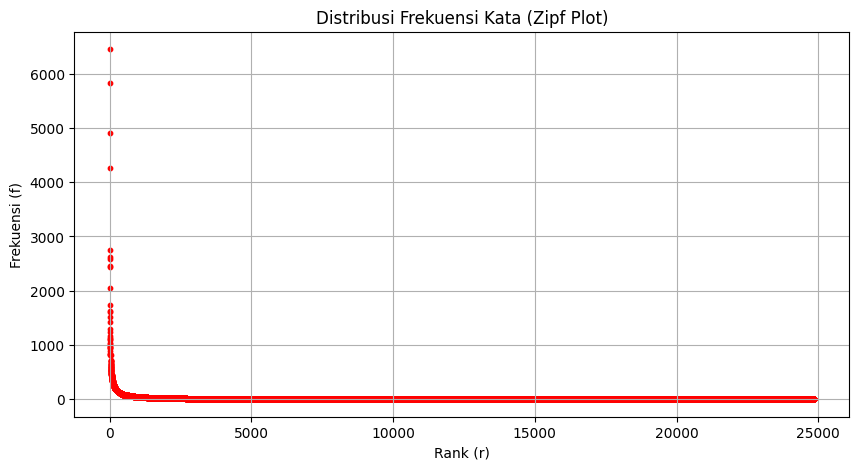

In [53]:
import matplotlib.pyplot as plt

rank = term_freq_df_sorted['Rank']
freq = term_freq_df_sorted['Frequency (ft,d)']

plt.figure(figsize=(10, 5))
plt.scatter(rank, freq, color='red', s=10)
plt.title("Distribusi Frekuensi Kata (Zipf Plot)")
plt.xlabel("Rank (r)")
plt.ylabel("Frekuensi (f)")
plt.grid(True)
plt.show()